In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
def load_json(file_path):
    with open(file_path, 'r') as fp:
        data = json.load(fp)
    return data

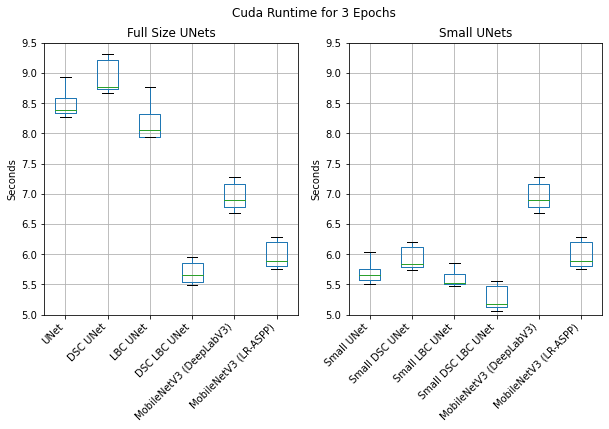

In [85]:
d = load_json(f'/home/dsola/repos/PGA-Net/src/train/times/model_profile_cuda_v{0}.json')
df = pd.DataFrame.from_dict(d, orient='index')
for i in range(1, 10):
    d = load_json(f'/home/dsola/repos/PGA-Net/src/train/times/model_profile_cuda_v{i}.json')
    df_tmp = pd.DataFrame.from_dict(d, orient='index')
    df[i] = df_tmp

df = df.drop('small_axial_lbc_unet')

naming_dict = {'unet': 'UNet', 'lbc_unet': 'LBC UNet', 'deeplab_mobile_net': 'MobileNetV3 (DeepLabV3)', 'lraspp_mobile_net': 'MobileNetV3 (LR-ASPP)',
       'dsc_unet': 'DSC UNet', 'small_dsc_unet': 'Small DSC UNet', 'dsc_lbc_unet': 'DSC LBC UNet', 'small_dsc_lbc_unet': 'Small DSC LBC UNet',
       'small_unet': 'Small UNet', 'small_lbc_unet': 'Small LBC UNet'}

df_small = df.T[['small_unet', 'small_dsc_unet', 'small_lbc_unet', 'small_dsc_lbc_unet', 'deeplab_mobile_net', 'lraspp_mobile_net']].rename(columns=naming_dict)
df_full = df.T[['unet', 'dsc_unet', 'lbc_unet', 'dsc_lbc_unet', 'deeplab_mobile_net', 'lraspp_mobile_net']].rename(columns=naming_dict)

fig, axs = plt.subplots(1,2, figsize=(10,5))
df_full.boxplot(column=[x for x in df_full.columns], rot=45, ax=axs[0])
axs[0].set_ylim(5,9.5)
axs[0].set_title('Full Size UNets')
axs[0].set_ylabel('Seconds')
plt.setp(axs[0].get_xticklabels(), horizontalalignment='right')
df_small.boxplot(column=[x for x in df_small.columns], rot=45, ax=axs[1])
axs[1].set_ylim(5,9.5)
axs[1].set_ylabel('Seconds')
axs[1].set_title('Small UNets');
plt.setp(axs[1].get_xticklabels(), horizontalalignment='right');
fig.suptitle('Cuda Runtime for 3 Epochs');

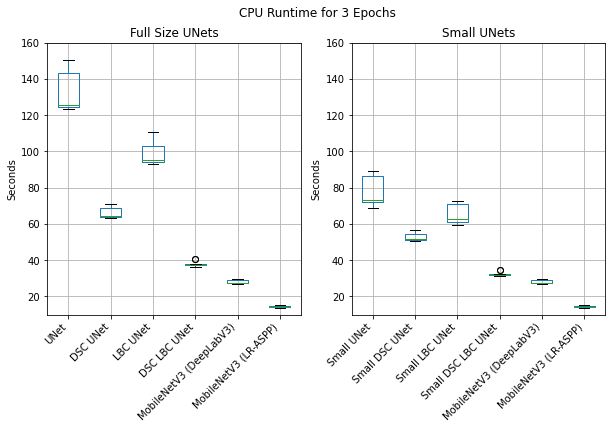

In [90]:
d = load_json(f'/home/dsola/repos/PGA-Net/src/train/times/model_profile_cpu_v{0}.json')
df = pd.DataFrame.from_dict(d, orient='index')
for i in range(1, 10):
    d = load_json(f'/home/dsola/repos/PGA-Net/src/train/times/model_profile_cpu_v{i}.json')
    df_tmp = pd.DataFrame.from_dict(d, orient='index')
    df[i] = df_tmp

df = df.drop('small_axial_lbc_unet')

naming_dict = {'unet': 'UNet', 'lbc_unet': 'LBC UNet', 'deeplab_mobile_net': 'MobileNetV3 (DeepLabV3)', 'lraspp_mobile_net': 'MobileNetV3 (LR-ASPP)',
       'dsc_unet': 'DSC UNet', 'small_dsc_unet': 'Small DSC UNet', 'dsc_lbc_unet': 'DSC LBC UNet', 'small_dsc_lbc_unet': 'Small DSC LBC UNet',
       'small_unet': 'Small UNet', 'small_lbc_unet': 'Small LBC UNet'}

df_small = df.T[['small_unet', 'small_dsc_unet', 'small_lbc_unet', 'small_dsc_lbc_unet', 'deeplab_mobile_net', 'lraspp_mobile_net']].rename(columns=naming_dict)
df_full = df.T[['unet', 'dsc_unet', 'lbc_unet', 'dsc_lbc_unet', 'deeplab_mobile_net', 'lraspp_mobile_net']].rename(columns=naming_dict)

fig, axs = plt.subplots(1,2, figsize=(10,5))
df_full.boxplot(column=[x for x in df_full.columns], rot=45, ax=axs[0])
axs[0].set_ylim(10,160)
axs[0].set_title('Full Size UNets')
axs[0].set_ylabel('Seconds')
plt.setp(axs[0].get_xticklabels(), horizontalalignment='right')
df_small.boxplot(column=[x for x in df_small.columns], rot=45, ax=axs[1])
axs[1].set_ylim(10,160)
axs[1].set_ylabel('Seconds')
axs[1].set_title('Small UNets');
plt.setp(axs[1].get_xticklabels(), horizontalalignment='right');
fig.suptitle('CPU Runtime for 3 Epochs');